# ACP - análisis de componentes principales

In [38]:
# 📦 Librerías para análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text
import matplotlib.cm as cm
import matplotlib.colors as mcolors


In [4]:
# 📂 Leer el archivo CSV con tus datos
df = pd.read_csv("../data/dataset_limpio.csv")

In [5]:
# 🧼 Eliminar columnas cualitativas que no se deben incluir en el PCA
# Asegúrate de que los índices coincidan con los de R (recuerda que Python empieza en 0)
quali_sup_idx = [0, 2, 4, 5, 6, 7, 9, 10, 11]
quali_sup_cols = df.columns[quali_sup_idx]
df_numeric = df.drop(columns=quali_sup_cols)

In [6]:
# ⚖️ Escalamos los datos numéricos para que todas las variables contribuyan por igual
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [7]:
# 📊 Aplicamos PCA con hasta 5 componentes para ver la varianza explicada
pca = PCA(n_components=5)
res_acp = pca.fit(df_scaled)

In [8]:
# 📈 Ver la proporción de varianza que explica cada componente
explained_var = pca.explained_variance_ratio_ * 100

print("Varianza explicada por cada dimensión:")
for i, var in enumerate(explained_var):
    print(f"Dim{i+1}: {var:.1f}%")

Varianza explicada por cada dimensión:
Dim1: 49.3%
Dim2: 38.2%
Dim3: 7.8%
Dim4: 3.0%
Dim5: 1.7%


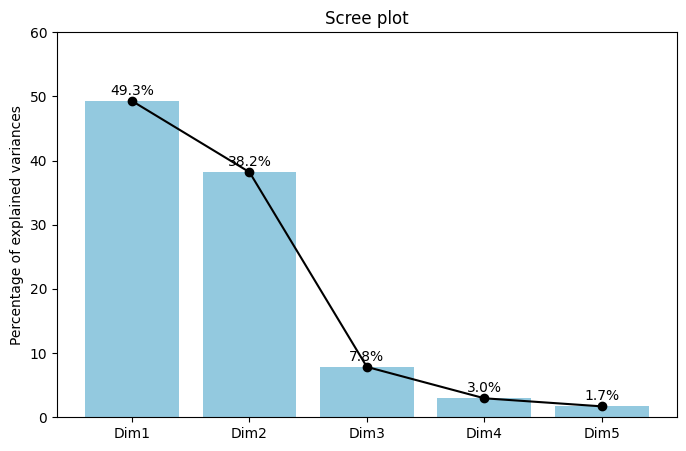

In [9]:
# 📉 Gráfico de sedimentación (Scree Plot)
plt.figure(figsize=(8, 5))
sns.barplot(x=[f"Dim{i+1}" for i in range(len(explained_var))], y=explained_var, color='skyblue')
plt.plot(range(len(explained_var)), explained_var, marker='o', color='black')
plt.title('Scree plot')
plt.ylabel('Percentage of explained variances')
plt.ylim(0, 60)
for i, v in enumerate(explained_var):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.show()

🔎 Interpretación:

- Las dos primeras dimensiones explican en conjunto el **87.5%** de la varianza total de los datos originales, lo que justifica plenamente su uso como base para visualización y análisis.
- A partir de la **Dim3**, las componentes adicionales aportan menos del 10% cada una, y su contribución disminuye rápidamente. Esto sugiere que son **menos relevantes para explicar la estructura principal** del dataset.
- La forma descendente del gráfico confirma el clásico "codo" en el gráfico, evidenciando que **dos componentes son suficientes** para capturar la información esencial, reduciendo la dimensionalidad con una pérdida mínima.


In [10]:
# 📍 Coordenadas de los individuos en las dos primeras dimensiones
coord_ind = pca.transform(df_scaled)[:, :2]

In [11]:
# 🧮 Usamos la varianza explicada como peso
peso_dim1 = explained_var[0] / 100
peso_dim2 = explained_var[1] / 100

# 🧮 Índice ACP (combinación ponderada de PC1 y PC2)
indice_ACP = coord_ind[:, 0] * peso_dim1 + coord_ind[:, 1] * peso_dim2


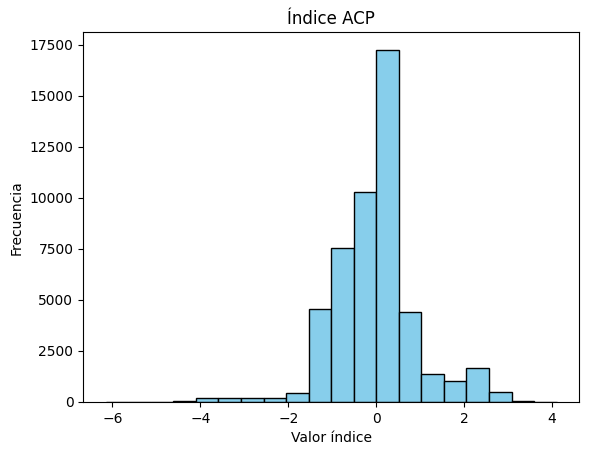

In [12]:
# 📊 Visualizamos la distribución del índice ACP original
plt.hist(indice_ACP, bins=20, color='skyblue', edgecolor='black')
plt.title("Índice ACP")
plt.xlabel("Valor índice")
plt.ylabel("Frecuencia")
plt.show()

🧮 Distribución del índice ACP (valor original)

Este gráfico muestra la distribución del índice ACP antes de ser escalado a una escala de 0 a 100. El índice fue calculado como una combinación ponderada de las dos primeras componentes principales, que resumen el comportamiento técnico y temporal de cada vehículo.

🔎 Observaciones clave:

- La distribución tiene una forma de **campana asimétrica**, centrada en torno a **0**, como se espera al combinar componentes centradas y normalizadas.
- La mayor parte de los registros se encuentra entre los valores **-1.5 y 2**, lo que indica una concentración de vehículos en rangos **moderadamente modernos y técnicamente equilibrados**.
- Existen valores negativos extremos (< -4) que pueden asociarse a **vehículos muy antiguos o de bajo rendimiento**, así como valores positivos altos (> 3) que pueden corresponder a **vehículos de alta gama o muy recientes**.
- La forma del histograma es útil para interpretar directamente los valores latentes del ACP antes de reescalarlos a una escala interpretable para usuarios finales (como el índice 0–100).

🧩 Aplicación técnica:

Este índice puede ser usado como entrada para:
- Algoritmos de **clustering** (K-means, DBSCAN) para segmentar flotas.
- Modelos predictivos de **riesgo mecánico o consumo energético**.
- Umbralización para clasificación de vehículos “por renovar” o “prioritarios”.


In [13]:
# 📏 Normalizamos el índice ACP a una escala 0-100
indice_rescalado = (indice_ACP - np.min(indice_ACP)) / (np.max(indice_ACP) - np.min(indice_ACP)) * 100

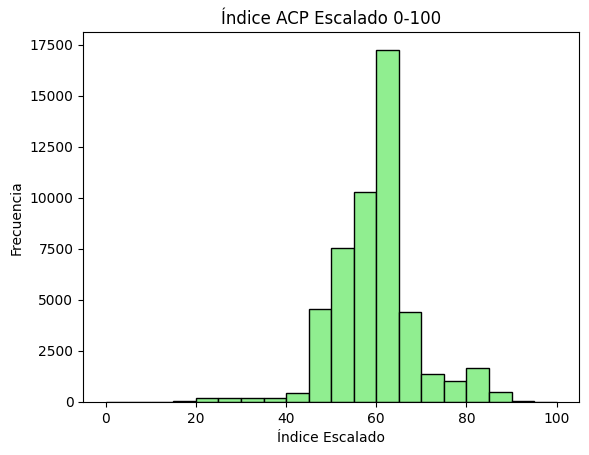

In [14]:
# 📊 Visualización del índice en escala 0-100
plt.hist(indice_rescalado, bins=20, color='lightgreen', edgecolor='black')
plt.title("Índice ACP Escalado 0-100")
plt.xlabel("Índice Escalado")
plt.ylabel("Frecuencia")
plt.show()

📊 Distribución del índice ACP escalado (0–100)

Este histograma muestra cómo se distribuyen los vehículos según su puntaje en el índice ACP, que combina la información técnica (peso, potencia, cilindraje) y temporal (modelo, año de registro) en una única medida estandarizada de 0 a 100.

🔎 Observaciones clave:

- La mayoría de los registros se concentran entre los valores **50 y 70**, con un pico alrededor del **60**, lo que indica que la mayoría de vehículos tienen un desempeño y antigüedad **moderadamente equilibrados**.
- Hay un pequeño grupo con valores superiores a 80, posiblemente correspondiente a vehículos **más nuevos y de mayor rendimiento**.
- También se observan casos atípicos en los extremos inferiores (< 30), lo que podría representar vehículos **antiguos o de bajo desempeño técnico**.
- La forma de campana ligeramente sesgada hacia la derecha sugiere que el índice puede ser útil para **clasificar vehículos por nivel de eficiencia o modernización relativa**.

🧩 Aplicaciones del índice:

- Clasificación de flotas para mantenimiento o renovación.
- Segmentación de mercado (alta gama vs. básica).
- Priorización para programas de incentivos o restricciones vehiculares.

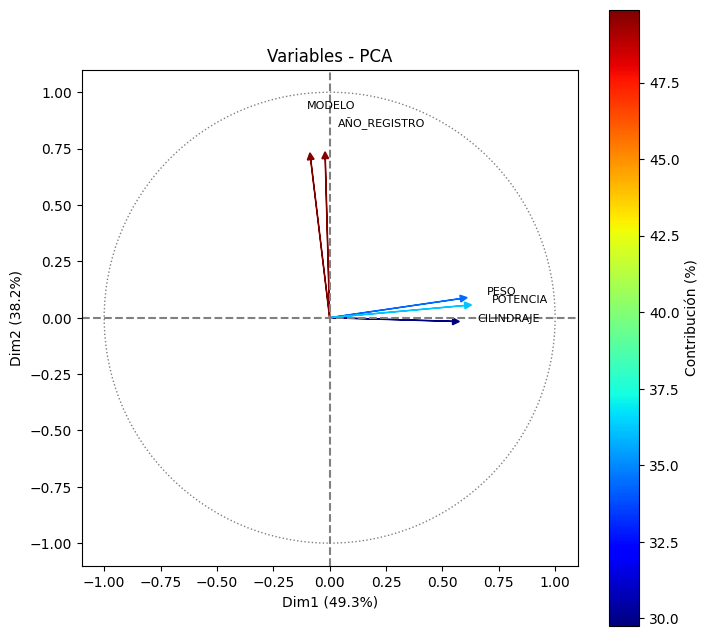

In [39]:
# 📊 Gráfico de dispersión de las dos primeras dimensiones

# 1. Cargar y preparar datos
df = pd.read_csv("../data/dataset_limpio.csv")
quali_sup_idx = [0, 2, 4, 5, 6, 7, 9, 10, 11]
df_numeric = df.drop(columns=df.columns[quali_sup_idx])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)
loadings = pca.components_.T
var_names = df_numeric.columns

# 2. Contribuciones (para color)
contrib = np.sum(loadings**2, axis=1) * 100
norm = mcolors.Normalize(vmin=np.min(contrib), vmax=np.max(contrib))
cmap = cm.jet

# 3. Crear gráfico
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='dotted')
ax.add_artist(circle)

texts = []
for i in range(len(var_names)):
    x, y = loadings[i, 0], loadings[i, 1]

    # Ajuste manual para MODELO y AÑO_REGISTRO
    if var_names[i] == "MODELO":
        x -= 0.00
        y += 0.07
    elif var_names[i] == "AÑO_REGISTRO":
        x += 0.05
        y += 0.00

    color = cmap(norm(contrib[i]))
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1],
             color=color, head_width=0.03, head_length=0.03)
    texts.append(ax.text(x * 1.2, y * 1.2, var_names[i], fontsize=8))

# 4. Líneas guía
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
ax.set_xlabel(f"Dim1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"Dim2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_title("Variables - PCA")
ax.set_aspect('equal')
plt.grid(False)

# 5. Barra de color
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Contribución (%)")

plt.show()


🎯 Interpretación del círculo de correlaciones – ACP

Este gráfico muestra la proyección de las variables numéricas sobre el plano formado por las dos primeras componentes principales (Dim1: 49.3%, Dim2: 38.2%).

🔎 Principales hallazgos:

- Las variables `PESO`, `POTENCIA` y `CILINDRAJE` se proyectan fuertemente sobre la **Dimensión 1**, indicando que esta componente resume principalmente la **capacidad técnica o desempeño mecánico** de los vehículos.
- Las variables `MODELO` y `AÑO_REGISTRO` se alinean casi exclusivamente con la **Dimensión 2**, lo que sugiere que este eje representa una **dimensión temporal o de actualización tecnológica**.
- La disposición ortogonal entre los dos grupos de variables (técnicas vs. temporales) indica que **son independientes entre sí**, es decir, el rendimiento del vehículo no está directamente condicionado por su año de registro o modelo.
- La longitud de las flechas y la intensidad del color muestran que **todas las variables contribuyen significativamente**, aunque `MODELO` y `AÑO_REGISTRO` dominan en Dim2, mientras que `PESO` es el mayor contribuyente en Dim1.


## 🧠 Conclusión general del análisis de componentes principales (ACP)

El Análisis de Componentes Principales (ACP) aplicado a las variables numéricas del parque automotor permitió **reducir la dimensionalidad del conjunto de datos** manteniendo la mayoría de la varianza explicada en solo dos dimensiones.

### 📊 Varianza explicada:

- La **Dimensión 1** explicó el **49.3%** de la varianza.
- La **Dimensión 2** explicó el **38.2%**.
- En conjunto, ambas dimensiones retienen aproximadamente el **87.5% de la información**, lo que justifica el uso del plano bidimensional como representación fiel de la estructura original del dataset.

---

### 📌 Variables más influyentes:

Según el círculo de correlaciones:

- **Dim1** está fuertemente asociada con variables técnicas como:
  - `PESO`
  - `POTENCIA`
  - `CILINDRAJE`
  
  Lo cual sugiere que representa la **potencia y el rendimiento físico** del vehículo.

- **Dim2** se asocia mayormente con:
  - `MODELO`
  - `AÑO_REGISTRO`
  
  Esto indica que esta dimensión captura el **nivel de actualización tecnológica o antigüedad** del vehículo.

---

### 📐 Representación factorial:

- Las variables `PESO`, `POTENCIA` y `CILINDRAJE` apuntan en la misma dirección, mostrando una **alta correlación entre ellas**.
- `MODELO` y `AÑO_REGISTRO` aparecen ortogonales a las anteriores, lo cual indica que **la antigüedad del vehículo no está directamente relacionada con su capacidad técnica**.

---

### 📈 Índice proyectado:

Se construyó un **índice ACP de escala 0-100**, ponderando las coordenadas en las dos primeras dimensiones, lo que permite:

- Comparar vehículos en un espacio reducido.
- Detectar extremos (vehículos de alta gama o muy antiguos).
- Posiblemente aplicar clustering o segmentación posterior.

---

### 🧩 Valor del ACP:

El ACP demostró ser una herramienta útil para:

- **Reducir la complejidad de las variables técnicas**.
- **Visualizar relaciones entre variables numéricas**.
- **Detectar patrones de rendimiento y modernización** del parque automotor.

Este análisis es altamente útil para estudios de **eficiencia energética, renovación vehicular, o benchmarking técnico** dentro de categorías.
